# Optimizing Sales Strategy and Customer Engagement for an E-Commerce Store # 

# Modules

In [1]:
# Data Proccessing
import pandas as pd
import numpy as np
# Data Visualization
import seaborn as sns
sns.set_theme(
    style="ticks",
    palette="deep",
    font_scale=1.1,
    rc={
        'figure.figsize': (12, 9),
        'figure.facecolor': 'white',
        'axes.spines.right': False,
        'axes.spines.top': False,
        'grid.alpha': 0.3,
        'axes.grid': True,
    }
    )
import matplotlib.pyplot as plt
# Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
# 
import warnings
warnings.filterwarnings('ignore')

****

# Reading Data

In [2]:
df = pd.read_csv("/kaggle/input/ecommerce-data/data.csv", encoding='latin-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


****
****

# Data Processing

## Data Types

In [3]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


**Customer ID Preferred to be Object, While InvoiceDate Should be in datetime**

In [4]:
df['CustomerID'] = df['CustomerID'].astype('object')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
# Create Required Columns for analysis
df['Hour'] = df['InvoiceDate'].dt.hour

df['InvoiceDate'] = pd.to_datetime(pd.to_datetime(df['InvoiceDate']).dt.date)
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day_Name'] = df['InvoiceDate'].dt.day_name()
df['TotalPrice'] = df['Quantity']*df['UnitPrice']

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Hour,Year,Month,Day_Name,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,8,2010,12,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,8,2010,12,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,8,2010,12,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,8,2010,12,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,8,2010,12,Wednesday,20.34


****

## Duplicated Values

In [8]:
df.duplicated().sum()

5269

In [9]:
true_duplicates = df[df.duplicated(keep=False)]

print(true_duplicates.head(10))

    InvoiceNo StockCode                        Description  Quantity  \
485    536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
489    536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
494    536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
517    536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
521    536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
527    536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537    536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539    536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
548    536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
555    536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   

    InvoiceDate  UnitPrice CustomerID         Country  Hour  Year  Month  \
485  2010-12-01       4.95    17908.0  United Kingdom    11  2010     12   
489  2010-12-01       2.10    17908.0  United Kingdom  

**Decision: To ensure the accuracy of quantitative analysis, all duplicate rows were removed, keeping only the first occurrence of each unique record.**

In [10]:
df.drop_duplicates(inplace= True, keep='first')
df.duplicated().sum()

0

****

## Outliers

In [11]:
print(df.describe())

            Quantity                    InvoiceDate      UnitPrice  \
count  536640.000000                         536640  536640.000000   
mean        9.620043  2011-07-03 19:22:15.670840832       4.632661   
min    -80995.000000            2010-12-01 00:00:00  -11062.060000   
25%         1.000000            2011-03-28 00:00:00       1.250000   
50%         3.000000            2011-07-19 00:00:00       2.080000   
75%        10.000000            2011-10-18 00:00:00       4.130000   
max     80995.000000            2011-12-09 00:00:00   38970.000000   
std       219.130360                            NaN      97.233208   

                Hour           Year          Month     TotalPrice  
count  536640.000000  536640.000000  536640.000000  536640.000000  
mean       13.077150    2010.921771       7.544818      18.123888  
min         6.000000    2010.000000       1.000000 -168469.600000  
25%        11.000000    2011.000000       5.000000       3.750000  
50%        13.000000    2011.

In [12]:
print(df[df['Quantity'] < 0 ].head())

    InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

    InvoiceDate  UnitPrice CustomerID         Country  Hour  Year  Month  \
141  2010-12-01      27.50    14527.0  United Kingdom     9  2010     12   
154  2010-12-01       4.65    15311.0  United Kingdom     9  2010     12   
235  2010-12-01       1.65    17548.0  United Kingdom    10  2010     12   
236  2010-12-01       0.29    17548.0  United Kingdom    10  2010     12   
237  2010-12-01       0.29    17548.0  United Kingdom    10  2010     12   

      Day_Name  TotalPrice  
141  Wednesday      -27.50  
154  Wednesday       -4.65  
235  Wednesday      -19.80  


In [13]:
print(df[df['Quantity'] > 10000 ].head())

       InvoiceNo StockCode                     Description  Quantity  \
61619     541431     23166  MEDIUM CERAMIC TOP STORAGE JAR     74215   
502122    578841     84826  ASSTD DESIGN 3D PAPER STICKERS     12540   
540421    581483     23843     PAPER CRAFT , LITTLE BIRDIE     80995   

       InvoiceDate  UnitPrice CustomerID         Country  Hour  Year  Month  \
61619   2011-01-18       1.04    12346.0  United Kingdom    10  2011      1   
502122  2011-11-25       0.00    13256.0  United Kingdom    15  2011     11   
540421  2011-12-09       2.08    16446.0  United Kingdom     9  2011     12   

       Day_Name  TotalPrice  
61619   Tuesday     77183.6  
502122   Friday         0.0  
540421   Friday    168469.6  


**This almost always represents a cancellation or a return of a product.**

**These are valid records. They represent money being credited back to the customer.**

In [14]:
print(df[df['UnitPrice'] < 0 ].head())

       InvoiceNo StockCode      Description  Quantity InvoiceDate  UnitPrice  \
299983   A563186         B  Adjust bad debt         1  2011-08-12  -11062.06   
299984   A563187         B  Adjust bad debt         1  2011-08-12  -11062.06   

       CustomerID         Country  Hour  Year  Month Day_Name  TotalPrice  
299983        NaN  United Kingdom    14  2011      8   Friday   -11062.06  
299984        NaN  United Kingdom    14  2011      8   Friday   -11062.06  


In [15]:
print(df[df['UnitPrice'] > 10000 ].head())

      InvoiceNo  StockCode Description  Quantity InvoiceDate  UnitPrice  \
15016   C537630  AMAZONFEE  AMAZON FEE        -1  2010-12-07   13541.33   
15017    537632  AMAZONFEE  AMAZON FEE         1  2010-12-07   13541.33   
16232   C537644  AMAZONFEE  AMAZON FEE        -1  2010-12-07   13474.79   
16356   C537651  AMAZONFEE  AMAZON FEE        -1  2010-12-07   13541.33   
43702   C540117  AMAZONFEE  AMAZON FEE        -1  2011-01-05   16888.02   

      CustomerID         Country  Hour  Year  Month   Day_Name  TotalPrice  
15016        NaN  United Kingdom    15  2010     12    Tuesday   -13541.33  
15017        NaN  United Kingdom    15  2010     12    Tuesday    13541.33  
16232        NaN  United Kingdom    15  2010     12    Tuesday   -13474.79  
16356        NaN  United Kingdom    15  2010     12    Tuesday   -13541.33  
43702        NaN  United Kingdom     9  2011      1  Wednesday   -16888.02  


**These are also valid, non-product records representing accounting adjustments.**

### Preparing suitable data for customer, product, and distribution analysis

In [16]:
non_product_keywords = ['POSTAGE', 'FEE', 'DISCOUNT', 'ADJUSTMENT', 'CARRIAGE', 'Manual']

# Create a pattern to match any of these keywords in the Description field
pattern = '|'.join(non_product_keywords)
is_non_product = df['Description'].str.contains(pattern, case=False, na=False)

# 1. Calculate Q1, Q3, and IQR
Q1_qty = df['Quantity'].quantile(0.25)
Q3_qty = df['Quantity'].quantile(0.75)
IQR_qty = Q3_qty - Q1_qty

Q1_up = df['UnitPrice'].quantile(0.25)
Q3_up = df['UnitPrice'].quantile(0.75)
IQR_up = Q3_up - Q1_up

# 2. Define the outlier boundaries
upper_bound_qty = Q3_qty + 6 * IQR_qty
upper_bound_up = Q3_up + 6 * IQR_up

# Step 3: Create the clean analysis dataframe for customer behavior
analysis_df = df[
    (df['Quantity'] > 0) &
    (df['Quantity'] <= upper_bound_qty) &
    (df['UnitPrice'] > 0) &
    (df['UnitPrice'] <= upper_bound_up) &
    (~is_non_product) 
].copy()


In [17]:
analysis_df.describe()

,Quantity,InvoiceDate,UnitPrice,Hour,Year,Month,TotalPrice
count,506087.000000,506087,506087.000000,506087.000000,506087.000000,506087.000000,506087.000000
mean,7.075750,2011-07-04 09:29:09.448612352,3.170192,13.092858,2010.921729,7.564616,14.424555
min,1.000000,2010-12-01 00:00:00,0.001000,6.000000,2010.000000,1.000000,0.001000
25%,1.000000,2011-03-28 00:00:00,1.250000,11.000000,2011.000000,5.000000,3.750000
50%,3.000000,2011-07-20 00:00:00,2.080000,13.000000,2011.000000,8.000000,9.480000
75%,10.000000,2011-10-19 00:00:00,4.130000,15.000000,2011.000000,11.000000,17.000000
max,64.000000,2011-12-09 00:00:00,21.230000,20.000000,2011.000000,12.000000,897.750000
std,9.037037,NaN,3.064753,2.437652,0.268598,3.508975,22.137177


****

## Missing Values

In [18]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
Hour                0
Year                0
Month               0
Day_Name            0
TotalPrice          0
dtype: int64

**It Appears That 25% of Customer Id Data is missing, this requires Further Analysis to make the right decision**

In [19]:
# 1. Isolate the rows with missing CustomerID
null_customer_df = df[df['CustomerID'].isna()]

# 2. Compare them to the rows with valid CustomerID
valid_customer_df = df[df['CustomerID'].notna()]

In [20]:
# 3. Check the Description of these transactions
print("Common items in null CustomerID transactions:")
print(null_customer_df['Description'].value_counts().head(10))

Common items in null CustomerID transactions:
Description
DOTCOM POSTAGE                       693
JUMBO BAG RED RETROSPOT              497
JUMBO STORAGE BAG SUKI               414
JUMBO SHOPPER VINTAGE RED PAISLEY    388
JUMBO BAG WOODLAND ANIMALS           372
JUMBO BAG PINK POLKADOT              348
RECYCLING BAG RETROSPOT              341
RED TOADSTOOL LED NIGHT LIGHT        328
SUKI  SHOULDER BAG                   326
GREEN REGENCY TEACUP AND SAUCER      324
Name: count, dtype: int64


In [21]:
# 4. Check if these transactions have specific Invoice numbers
print("Sample of InvoiceNos with null CustomerID:")
print(null_customer_df['InvoiceNo'].astype(str).str[0].value_counts())

Sample of InvoiceNos with null CustomerID:
InvoiceNo
5    134655
C       379
A         3
Name: count, dtype: int64


In [22]:
# 5. Compare key metrics
print(f"Average Quantity (Null CustomerID): {null_customer_df['Quantity'].mean()}")
print(f"Average Quantity (Valid CustomerID): {valid_customer_df['Quantity'].mean()}")

print(f"Average UnitPrice (Null CustomerID): {null_customer_df['UnitPrice'].mean()}")
print(f"Average UnitPrice (Valid CustomerID): {valid_customer_df['UnitPrice'].mean()}")

Average Quantity (Null CustomerID): 1.996867525196798
Average Quantity (Valid CustomerID): 12.183297933531373
Average UnitPrice (Null CustomerID): 8.078342380236528
Average UnitPrice (Valid CustomerID): 3.4740674347552183


### Data Segmentation ( Customers Data and Overall Business Data )

**These records represent operational overhead (postage, packaging) and system adjustments (cancellations), not the purchasing behavior of identifiable customers. Therefore, they are removed for analyses focusing on customer segmentation, retention (cohort analysis), and lifetime value (RFM analysis) to avoid skewing the results.**

In [23]:
customer_df = analysis_df.dropna().copy()
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 377176 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    377176 non-null  object        
 1   StockCode    377176 non-null  object        
 2   Description  377176 non-null  object        
 3   Quantity     377176 non-null  int64         
 4   InvoiceDate  377176 non-null  datetime64[ns]
 5   UnitPrice    377176 non-null  float64       
 6   CustomerID   377176 non-null  object        
 7   Country      377176 non-null  object        
 8   Hour         377176 non-null  int32         
 9   Year         377176 non-null  int32         
 10  Month        377176 non-null  int32         
 11  Day_Name     377176 non-null  object        
 12  TotalPrice   377176 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(3), int64(1), object(6)
memory usage: 36.0+ MB


**For calculating total revenue, analyzing sales trends over time, and identifying best-selling product lines, the entire dataset is used. Fees like postage contribute to overall income, and including cancellations is necessary for an accurate financial picture**

In [24]:
business_df = df.copy()
business_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536640 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536640 non-null  object        
 1   StockCode    536640 non-null  object        
 2   Description  535186 non-null  object        
 3   Quantity     536640 non-null  int64         
 4   InvoiceDate  536640 non-null  datetime64[ns]
 5   UnitPrice    536640 non-null  float64       
 6   CustomerID   401603 non-null  object        
 7   Country      536640 non-null  object        
 8   Hour         536640 non-null  int32         
 9   Year         536640 non-null  int32         
 10  Month        536640 non-null  int32         
 11  Day_Name     536640 non-null  object        
 12  TotalPrice   536640 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(3), int64(1), object(6)
memory usage: 51.2+ MB


****
****

# EDA

## Overall financial health of the business

**Total Revenue, Total Orders, Average Order Value**

In [25]:
# Calculate Total Revenue, Total Orders, AOV
total_revenue = sum(business_df['TotalPrice'])
total_orders = business_df['InvoiceNo'].nunique()
aov = total_revenue/total_orders
# Present Fingdings
print(f"Total Revenue: {total_revenue}")
print('')
print(f"Total Orders: {total_orders}")
print('')
print(f"Average Order value: {aov}")
print('')

Total Revenue: 9726003.054003103

Total Orders: 25900

Average Order value: 375.5213534364132



****

## Sales trend over time

In [26]:
# Monthly Trend Data
monthly_trend = business_df.groupby('InvoiceDate').agg(
    Orders=('InvoiceNo', 'nunique'),
    Revenue=('TotalPrice', 'sum')
).reset_index()

# Sort by date to ensure the plot is in chronological order
monthly_trend = monthly_trend.sort_values('InvoiceDate')

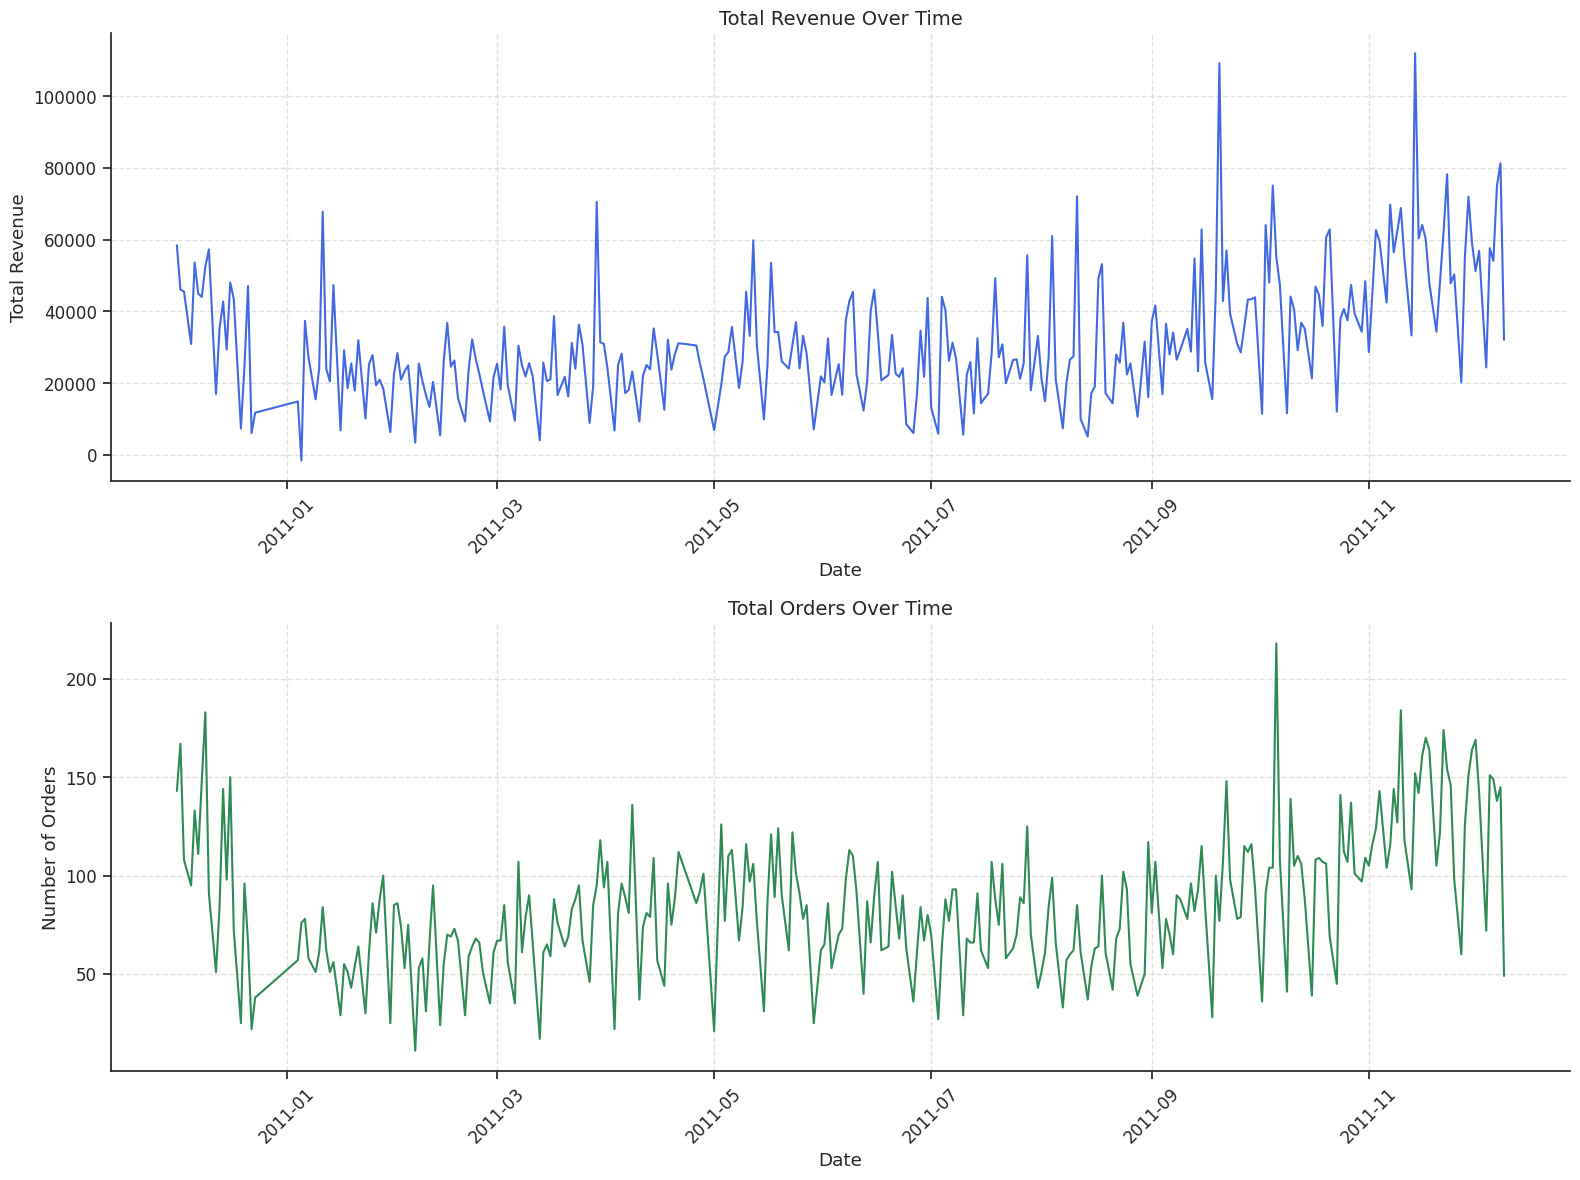

In [27]:
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Plot 1: Total Revenue (on the left subplot, axes[0])
axes[0].plot(monthly_trend['InvoiceDate'], monthly_trend['Revenue'], color='royalblue')
axes[0].set_title('Total Revenue Over Time', fontsize=14)
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Total Revenue')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, linestyle='--', alpha=0.6)

# Plot 2: Number of Unique Invoices (on the right subplot, axes[1])
axes[1].plot(monthly_trend['InvoiceDate'], monthly_trend['Orders'], color='seagreen')
axes[1].set_title('Total Orders Over Time', fontsize=14)
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Number of Orders')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, linestyle='--', alpha=0.6)

# Adjust layout to prevent labels from overlapping
plt.tight_layout()
# Save Plot
plt.savefig('revenue_and_invoices_side_by_side.png')

In [28]:
# 1. Filter the DataFrame for the specific year and month
december_2011_df = business_df[
    (business_df['InvoiceDate'].dt.year == 2011) &
    (business_df['InvoiceDate'].dt.month == 12)
]

# 2. Find the latest date in that month
if not december_2011_df.empty:
    last_date = december_2011_df['InvoiceDate'].max()
    print(f"The last recorded transaction date in December 2011 is: {last_date.date()}")
    
    # 3. Interpret the result
    if last_date.day < 31:
        print("\nConclusion: The data for December 2011 appears to be incomplete.")
    else:
        print("\nConclusion: The data for December 2011 runs to the end of the month.")
else:
    print("No data found for December 2011.")

The last recorded transaction date in December 2011 is: 2011-12-09

Conclusion: The data for December 2011 appears to be incomplete.


**Major Autumn Spike May Be due to Holiday Shopping Season, while the drop in Dec 2011 is due to incomplete data**

****

## How is the business performing geographically

In [29]:
country_spread = business_df.groupby('Country').agg(
    Orders=('InvoiceNo', 'nunique'),
    Revenue=('TotalPrice', 'sum')
).reset_index()
country_spread = country_spread.sort_values('Revenue',ascending=False)
print(country_spread)

                 Country  Orders      Revenue
36        United Kingdom   23494  8167124.284
24           Netherlands     101   284661.540
10                  EIRE     360   262993.380
14               Germany     603   221509.470
13                France     461   197317.110
0              Australia      69   137009.770
33           Switzerland      74    56363.050
31                 Spain     105    54756.030
3                Belgium     119    40910.960
32                Sweden      46    36585.410
20                 Japan      28    35340.620
25                Norway      40    35163.460
27              Portugal      71    29302.970
12               Finland      48    22326.740
6        Channel Islands      33    20076.390
9                Denmark      21    18768.140
19                 Italy      55    16890.510
7                 Cyprus      20    12858.760
1                Austria      19    10154.320
16             Hong Kong      15     9908.240
30             Singapore      10  

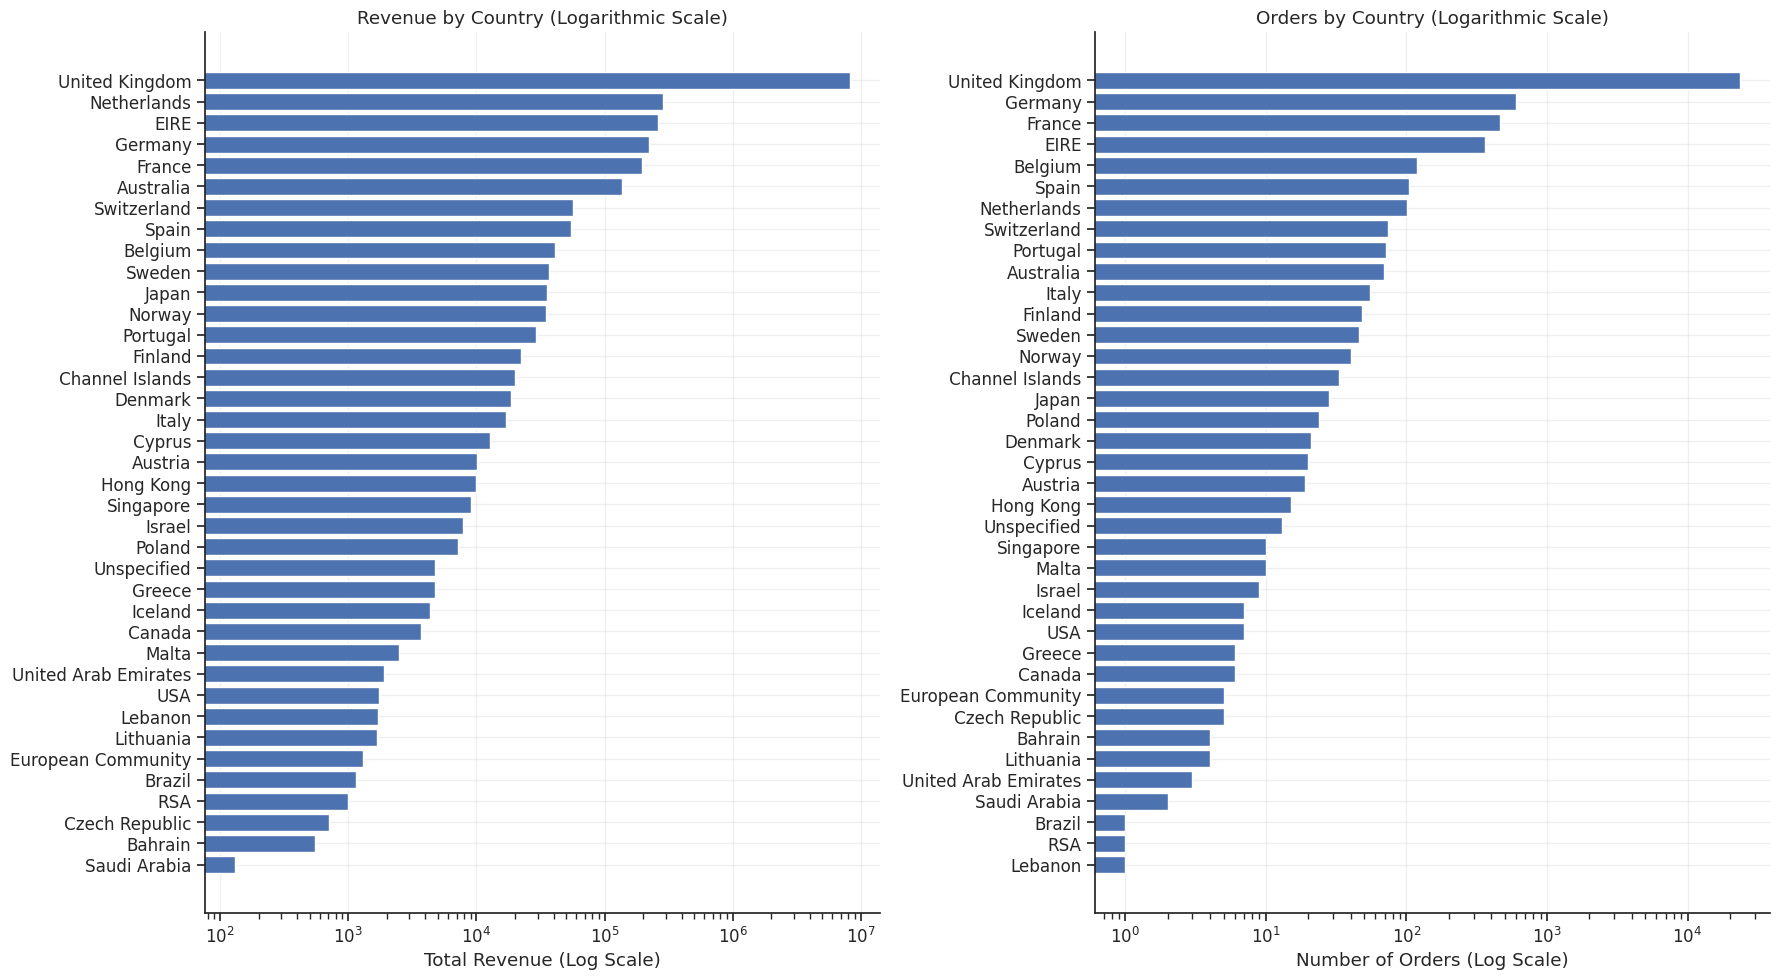

In [30]:
fig_all, axes_all = plt.subplots(1, 2, figsize=(18, 10))

# Left subplot: Revenue
df_rev_all = country_spread.sort_values('Revenue', ascending=True)
axes_all[0].barh(df_rev_all['Country'], df_rev_all['Revenue'])
axes_all[0].set_xscale('log') # Use a logarithmic scale
axes_all[0].set_title('Revenue by Country (Logarithmic Scale)')
axes_all[0].set_xlabel('Total Revenue (Log Scale)')

# Right subplot: Orders
df_ord_all = country_spread.sort_values('Orders', ascending=True)
axes_all[1].barh(df_ord_all['Country'], df_ord_all['Orders'])
axes_all[1].set_xscale('log') # Use a logarithmic scale
axes_all[1].set_title('Orders by Country (Logarithmic Scale)')
axes_all[1].set_xlabel('Number of Orders (Log Scale)')

plt.tight_layout()
plt.savefig('charts_including_uk_log_scale.png')

**The UK accounts for over 80% of the total revenue,and has more than 50 times the number of orders compared to the next leading country**

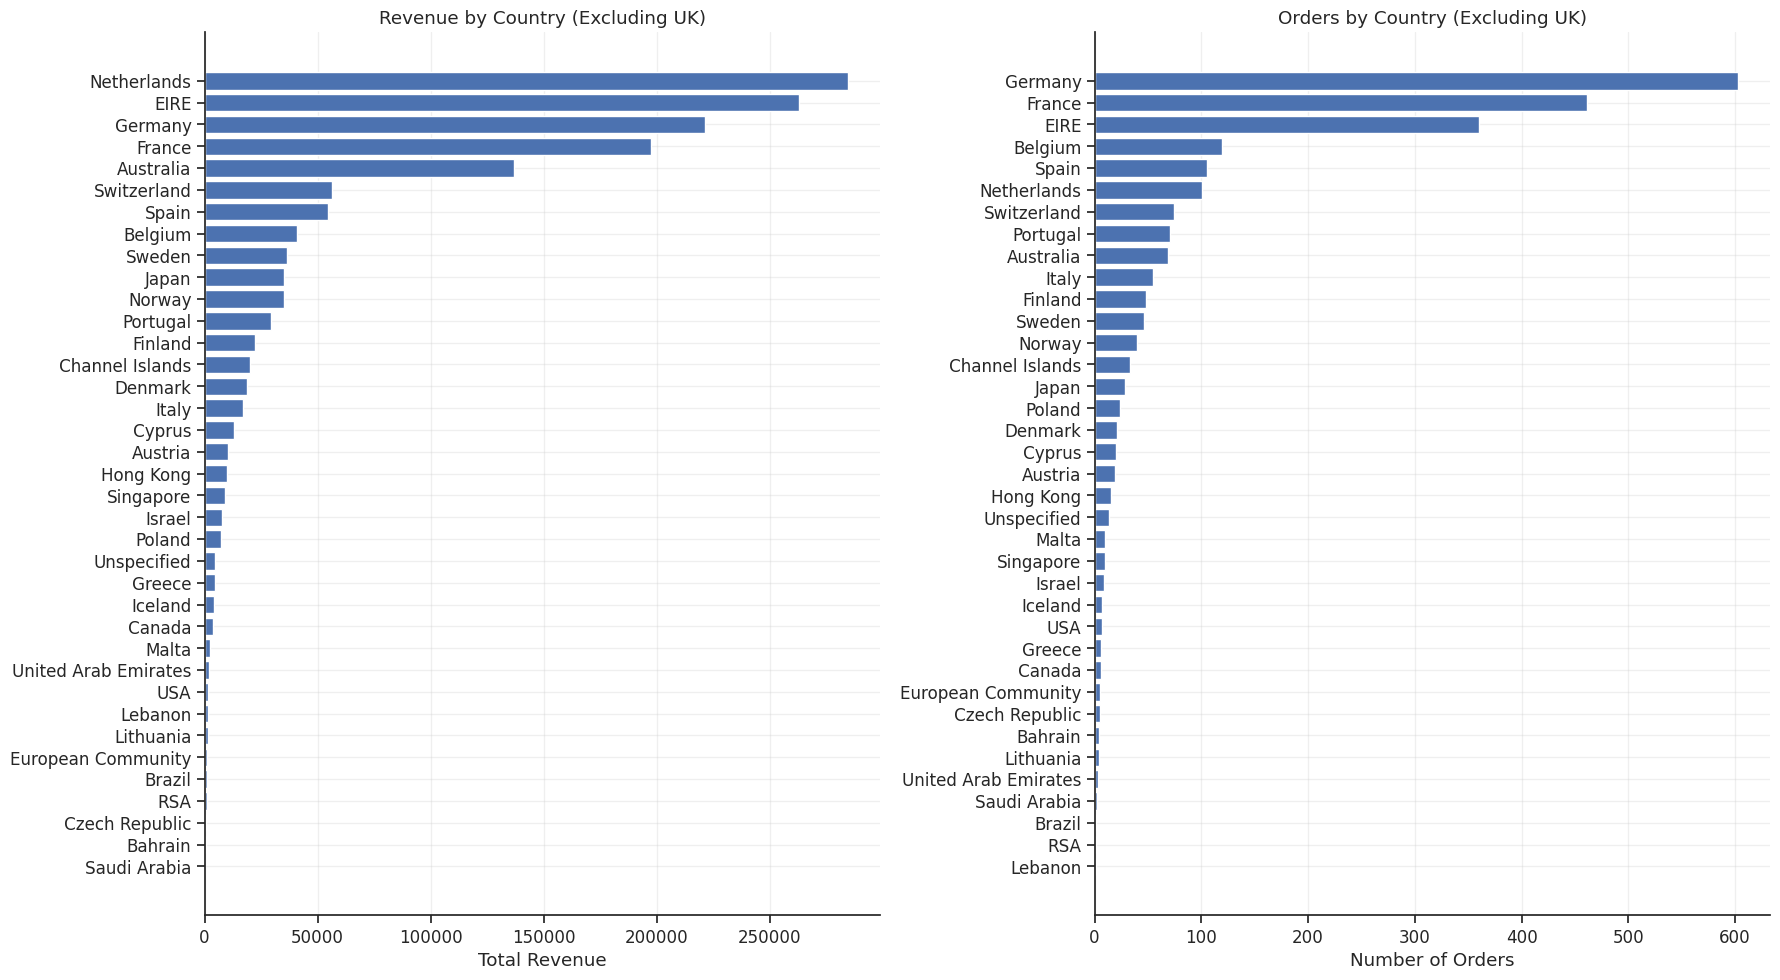

In [31]:
df_no_uk = country_spread[country_spread['Country'] != 'United Kingdom']

# Create a figure with two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

# Left subplot: Revenue
df_revenue = df_no_uk.sort_values('Revenue', ascending=True)
axes[0].barh(df_revenue['Country'], df_revenue['Revenue'])
axes[0].set_title('Revenue by Country (Excluding UK)')
axes[0].set_xlabel('Total Revenue')

# Right subplot: Orders
df_orders = df_no_uk.sort_values('Orders', ascending=True)
axes[1].barh(df_orders['Country'], df_orders['Orders'])
axes[1].set_title('Orders by Country (Excluding UK)')
axes[1].set_xlabel('Number of Orders')

plt.tight_layout()
plt.savefig('charts_excluding_uk.png')

**While Germany has 6 times the number of orders of Netherlands, The Netherlands Has Revenue 30% Higher than Germany**

****

## Who are our most valuable customers

### Recency, Frequency, Monetary

In [32]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 377176 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    377176 non-null  object        
 1   StockCode    377176 non-null  object        
 2   Description  377176 non-null  object        
 3   Quantity     377176 non-null  int64         
 4   InvoiceDate  377176 non-null  datetime64[ns]
 5   UnitPrice    377176 non-null  float64       
 6   CustomerID   377176 non-null  object        
 7   Country      377176 non-null  object        
 8   Hour         377176 non-null  int32         
 9   Year         377176 non-null  int32         
 10  Month        377176 non-null  int32         
 11  Day_Name     377176 non-null  object        
 12  TotalPrice   377176 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(3), int64(1), object(6)
memory usage: 36.0+ MB


In [33]:
snapshot_date = pd.to_datetime('2011-12-10')

RFM = customer_df.groupby('CustomerID').agg(
    Recency=('InvoiceDate','max'),
    Frequency=('InvoiceNo','nunique'),
    Revenue=('TotalPrice','sum')
).reset_index()
RFM['AOV'] = round(RFM['Revenue']/RFM['Frequency'],2)
RFM['Recency'] = (snapshot_date - RFM['Recency']).dt.days


print(RFM.head())

   CustomerID  Recency  Frequency  Revenue      AOV
0     12347.0        3          7  4060.40   580.06
1     12348.0      249          3   200.60    66.87
2     12349.0       19          1  1417.60  1417.60
3     12350.0      311          1   294.40   294.40
4     12352.0       37          7  1365.94   195.13


In [34]:
# Create labels and assign scores from 1 to 5
r_labels = range(5, 0, -1) # Lower recency (more recent) gets a higher score
f_labels = range(1, 5)
m_labels = range(1, 6)

# Create RFM scores based on quintiles
RFM['R_score'] = pd.qcut(RFM['Recency'], q=5, labels=r_labels, duplicates='drop').astype(int)
RFM['F_score'] = pd.qcut(RFM['Frequency'], q=5, labels=f_labels, duplicates='drop').astype(int)
RFM['M_score'] = pd.qcut(RFM['Revenue'], q=5, labels=m_labels, duplicates='drop').astype(int)

# Combine the scores into a single RFM score
RFM['RFM_Score'] = RFM['R_score'].astype(str) + RFM['F_score'].astype(str) + RFM['M_score'].astype(str)


In [35]:
# Create a dictionary to map scores to segment names
segment_map = {
    r'[4-5][4-5][4-5]': 'Champions',
    r'[3-5][3-5][1-5]': 'Loyal Customers',
    r'[4-5][1-2][1-5]': 'Recent Customers',
    r'[2-3][1-3][1-5]': 'Potential Loyalists',
    r'[1-3][3-5][1-5]': 'At-Risk Customers',
    r'[1-2][1-2][1-5]': 'Needs Attention',
    r'[1-2][1-5][4-5]': 'Big Spenders'
}

# Create a new 'Segment' column
RFM['Segment'] = RFM['RFM_Score'].replace(segment_map, regex=True)

In [36]:
segment_analysis = RFM.groupby('Segment').agg(
    Avg_Recency=('Recency', 'mean'),
    Avg_Frequency=('Frequency', 'mean'),
    Avg_Revenue=('Revenue', 'mean'),
    Customer_Count=('CustomerID', 'count')
).round(1).sort_values(by='Customer_Count', ascending=False).reset_index()

segment_analysis

,Segment,Avg_Recency,Avg_Frequency,Avg_Revenue,Customer_Count
0,Potential Loyalists,89.2,1.9,638.4,1388
1,Needs Attention,269.7,1.3,356.0,816
2,Recent Customers,17.7,1.9,588.8,717
3,Champions,12.1,13.6,5029.2,643
4,Loyal Customers,30.2,5.2,1733.8,617
5,At-Risk Customers,164.4,7.3,1719.3,79


In [37]:
print(segment_analysis)

               Segment  Avg_Recency  Avg_Frequency  Avg_Revenue  \
0  Potential Loyalists         89.2            1.9        638.4   
1      Needs Attention        269.7            1.3        356.0   
2     Recent Customers         17.7            1.9        588.8   
3            Champions         12.1           13.6       5029.2   
4      Loyal Customers         30.2            5.2       1733.8   
5    At-Risk Customers        164.4            7.3       1719.3   

   Customer_Count  
0            1388  
1             816  
2             717  
3             643  
4             617  
5              79  


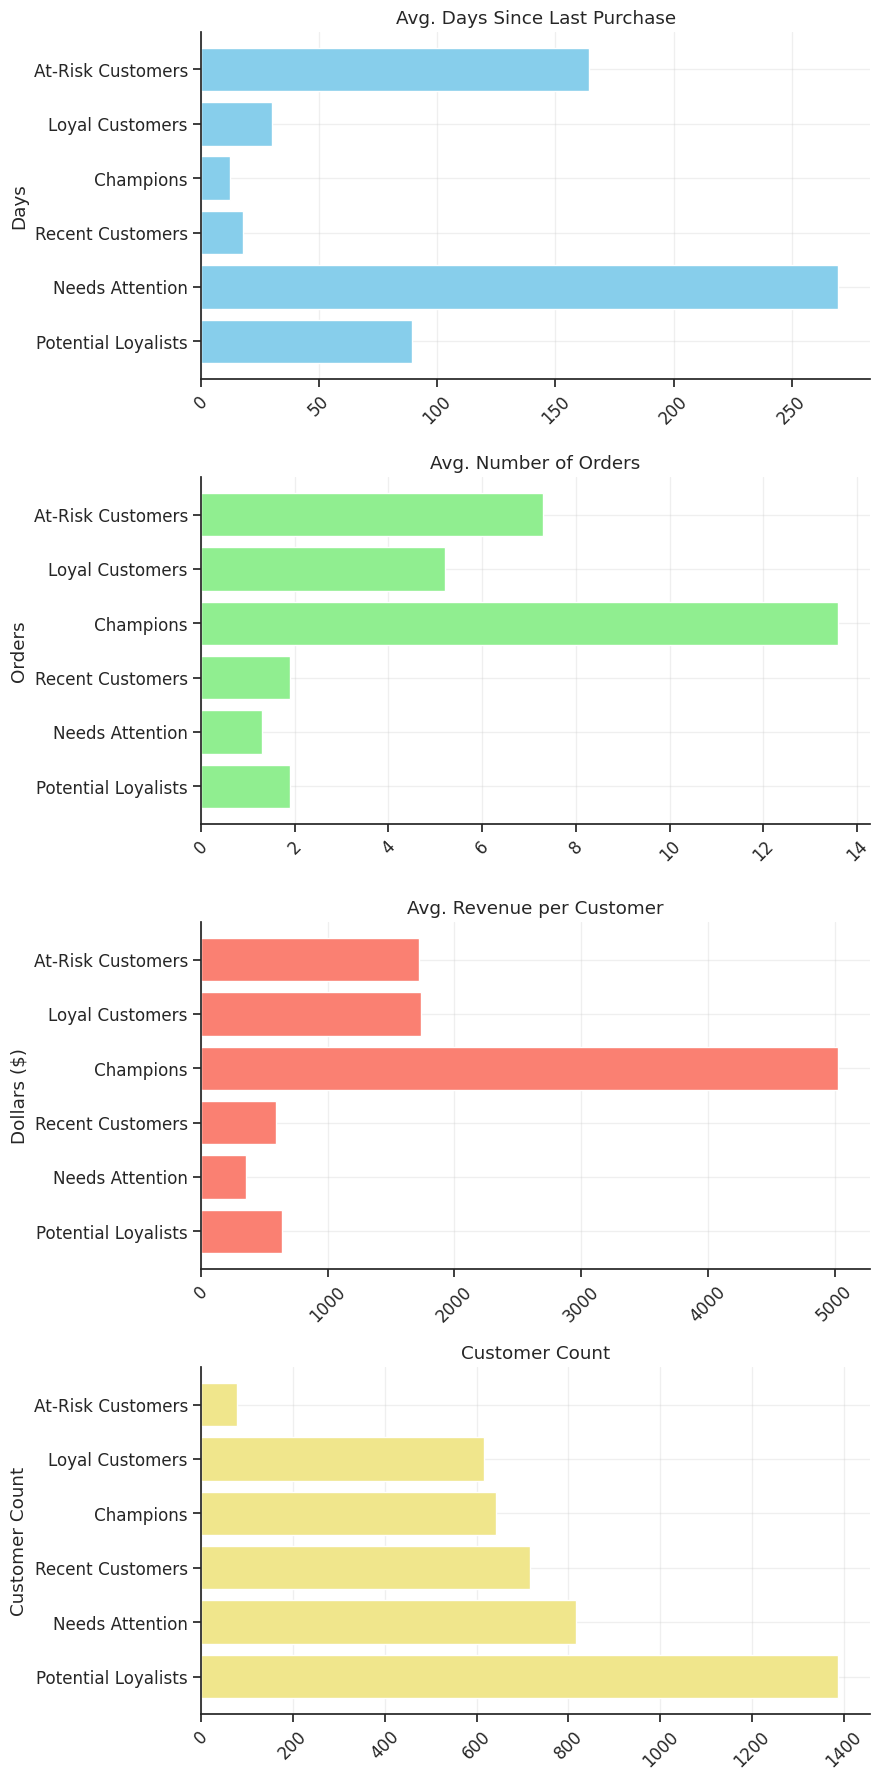

In [38]:
fig, (ax1, ax2, ax3,ax4) = plt.subplots(4, 1, figsize=(9, 18))

# Plot 1: Average Recency
ax1.barh(segment_analysis['Segment'], segment_analysis['Avg_Recency'], color='skyblue')
ax1.set_title('Avg. Days Since Last Purchase')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylabel('Days')

# Plot 2: Average Frequency
ax2.barh(segment_analysis['Segment'], segment_analysis['Avg_Frequency'], color='lightgreen')
ax2.set_title('Avg. Number of Orders')
ax2.tick_params(axis='x', rotation=45)
ax2.set_ylabel('Orders')

# Plot 3: Average Revenue
ax3.barh(segment_analysis['Segment'], segment_analysis['Avg_Revenue'], color='salmon')
ax3.set_title('Avg. Revenue per Customer')
ax3.tick_params(axis='x', rotation=45)
ax3.set_ylabel('Dollars ($)')

# Plot 4: Total Customers
ax4.barh(segment_analysis['Segment'], segment_analysis['Customer_Count'], color='khaki')
ax4.set_title('Customer Count')
ax4.tick_params(axis='x', rotation=45)
ax4.set_ylabel('Customer Count')

plt.tight_layout()
plt.show()

****

## retaining customers

### Cohort Analysis

In [39]:
# Create Nedded Columns
customer_df['year_month'] = df['InvoiceDate'].dt.to_period('M')

customer_df['CohortMonth'] = customer_df.groupby('CustomerID')['year_month'].transform('min')
# -----
invoice_month = customer_df['InvoiceDate'].dt.year * 12 + customer_df['InvoiceDate'].dt.month
cohort_month = customer_df['CohortMonth'].dt.year * 12 + customer_df['CohortMonth'].dt.month

customer_df['CohortIndex']=  invoice_month - cohort_month

In [40]:
# Group by cohort month and index, then count unique customers
cohort_data = customer_df.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique()

# Create the pivot table (cohort table)
cohort_counts = cohort_data.unstack(level=1)
cohort_counts

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12,856.0,311.0,274.0,320.0,306.0,345.0,308.0,294.0,294.0,330.0,315.0,430.0,223.0
2011-01,407.0,88.0,113.0,91.0,129.0,116.0,100.0,99.0,124.0,133.0,147.0,48.0,NaN
2011-02,367.0,68.0,71.0,104.0,101.0,90.0,92.0,99.0,93.0,115.0,25.0,NaN,NaN
2011-03,450.0,66.0,109.0,90.0,103.0,76.0,119.0,104.0,121.0,38.0,NaN,NaN,NaN
2011-04,293.0,63.0,60.0,60.0,56.0,69.0,65.0,74.0,21.0,NaN,NaN,NaN,NaN
2011-05,279.0,57.0,50.0,49.0,59.0,66.0,74.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06,234.0,40.0,35.0,62.0,53.0,77.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,192.0,33.0,42.0,45.0,52.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,168.0,31.0,40.0,41.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# Get the initial size of each cohort (the first column)
cohort_size = cohort_counts.iloc[:, 0]

# Divide the counts by the cohort size to get the retention rate
retention = cohort_counts.div(cohort_size, axis=0)
retention.index = retention.index.strftime('%Y-%m')

retention

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12,1.0,0.363318,0.320093,0.373832,0.357477,0.403037,0.359813,0.343458,0.343458,0.385514,0.367991,0.502336,0.260514
2011-01,1.0,0.216216,0.277641,0.223587,0.316953,0.285012,0.245700,0.243243,0.304668,0.326781,0.361179,0.117936,NaN
2011-02,1.0,0.185286,0.193460,0.283379,0.275204,0.245232,0.250681,0.269755,0.253406,0.313351,0.068120,NaN,NaN
2011-03,1.0,0.146667,0.242222,0.200000,0.228889,0.168889,0.264444,0.231111,0.268889,0.084444,NaN,NaN,NaN
2011-04,1.0,0.215017,0.204778,0.204778,0.191126,0.235495,0.221843,0.252560,0.071672,NaN,NaN,NaN,NaN
2011-05,1.0,0.204301,0.179211,0.175627,0.211470,0.236559,0.265233,0.096774,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.170940,0.149573,0.264957,0.226496,0.329060,0.098291,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.171875,0.218750,0.234375,0.270833,0.119792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.184524,0.238095,0.244048,0.130952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


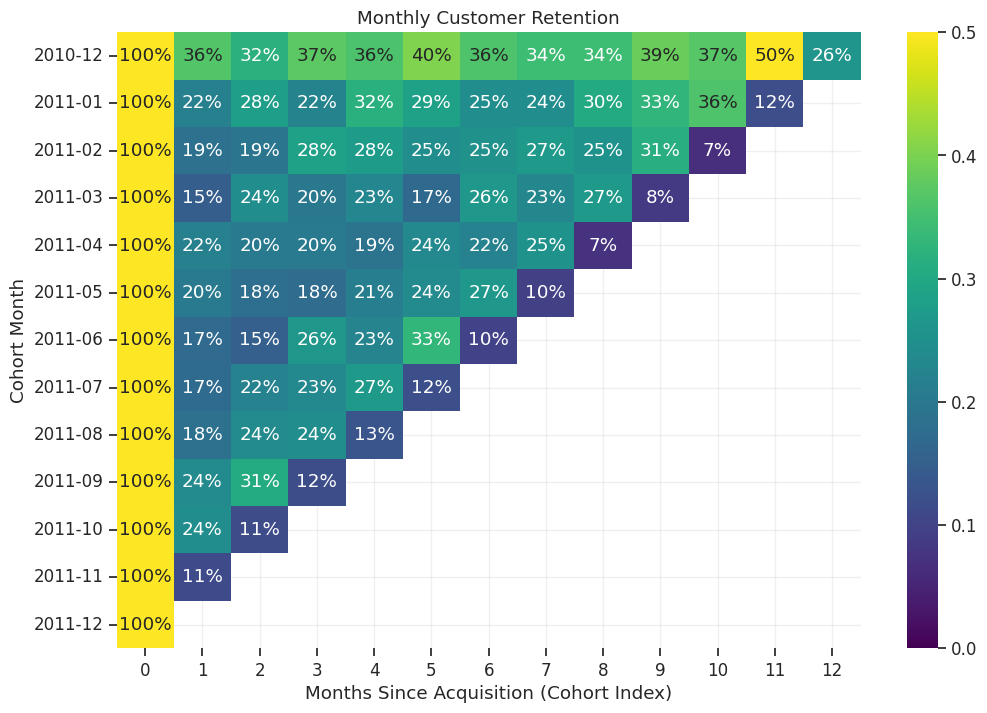

In [42]:
# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    retention,
    annot=True,          
    fmt='.0%',         
    cmap='viridis',      
    vmin=0.0,
    vmax=0.5    )         
plt.title('Monthly Customer Retention')
plt.ylabel('Cohort Month')
plt.xlabel('Months Since Acquisition (Cohort Index)')
plt.savefig('Cohort_heatmap.png')
plt.show()

**Cutomser Who Made Their First Purchase on 2010-12 showed the highest retention % over the year with a spike 50% on november may indicate succesful holiday season**

****

## When do customers shop?

In [43]:
weekdays = customer_df.groupby('Day_Name').agg(
    total_orders = ('InvoiceNo','nunique'),
    revenue = ('TotalPrice','sum')
).reset_index()
weekdays

,Day_Name,total_orders,revenue
0,Friday,2669,909306.151
1,Monday,2709,968931.601
2,Sunday,2140,676505.411
3,Thursday,3848,1320793.480
4,Tuesday,2999,1055463.551
5,Wednesday,3266,1107107.180


In [44]:
weekdays['orders_pct'] = round((weekdays['total_orders'] / sum(weekdays['total_orders'])),4)
weekdays['revenue_pct'] = round((weekdays['revenue'] / sum(weekdays['revenue'])),4)
weekdays

,Day_Name,total_orders,revenue,orders_pct,revenue_pct
0,Friday,2669,909306.151,0.1514,0.1506
1,Monday,2709,968931.601,0.1536,0.1605
2,Sunday,2140,676505.411,0.1214,0.1120
3,Thursday,3848,1320793.480,0.2183,0.2187
4,Tuesday,2999,1055463.551,0.1701,0.1748
5,Wednesday,3266,1107107.180,0.1852,0.1834


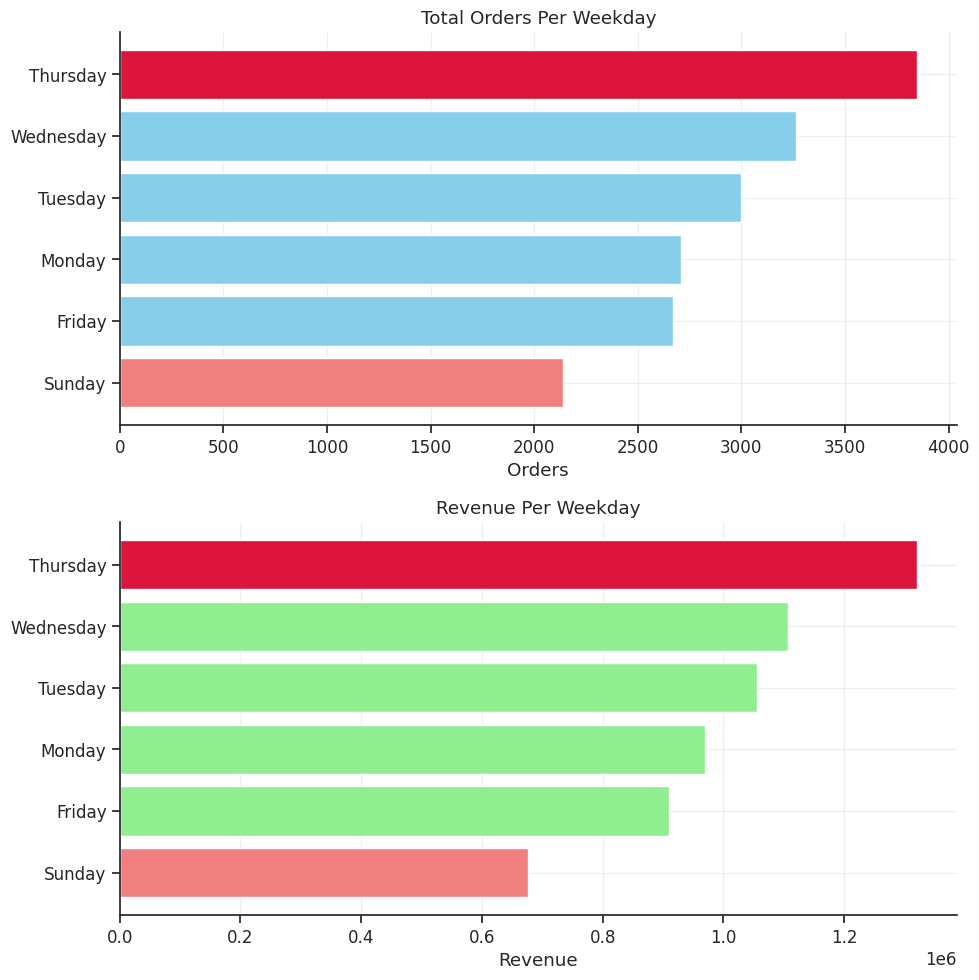

In [45]:
# 1. Sort the data for each plot
orders_sorted = weekdays.sort_values('total_orders', ascending=True)
revenue_sorted = weekdays.sort_values('revenue', ascending=True)

# 2. Create color lists to highlight the max and min values
orders_colors = ['crimson' if x == orders_sorted['total_orders'].max() else 'lightcoral' if x == orders_sorted['total_orders'].min() else 'skyblue' for x in orders_sorted['total_orders']]
revenue_colors = ['crimson' if x == revenue_sorted['revenue'].max() else 'lightcoral' if x == revenue_sorted['revenue'].min() else 'lightgreen' for x in revenue_sorted['revenue']]

# 3. Create the subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plot 1: Total Orders 
ax1.barh(orders_sorted['Day_Name'], orders_sorted['total_orders'], color=orders_colors)
ax1.set_title('Total Orders Per Weekday')
ax1.set_xlabel('Orders')

# Plot 2: Revenue
ax2.barh(revenue_sorted['Day_Name'], revenue_sorted['revenue'], color=revenue_colors)
ax2.set_title('Revenue Per Weekday')
ax2.set_xlabel('Revenue')

plt.tight_layout()
plt.savefig('Weekday_Bar.png')
plt.show()

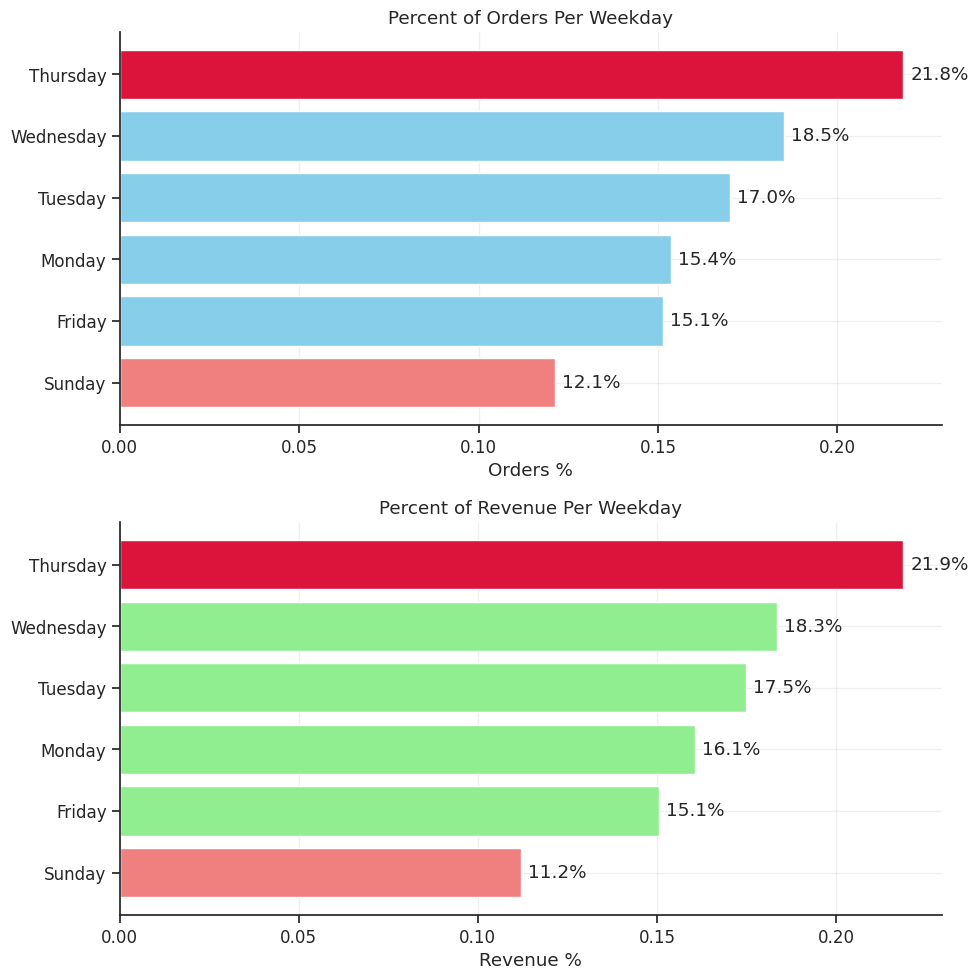

In [46]:
# 1. Sort the data for each plot
orders_sorted = weekdays.sort_values('orders_pct', ascending=True)
revenue_sorted = weekdays.sort_values('revenue_pct', ascending=True)

# 2. Create color lists to highlight the max and min values
orders_colors = ['crimson' if x == orders_sorted['orders_pct'].max() else 'lightcoral' if x == orders_sorted['orders_pct'].min() else 'skyblue' for x in orders_sorted['orders_pct']]
revenue_colors = ['crimson' if x == revenue_sorted['revenue_pct'].max() else 'lightcoral' if x == revenue_sorted['revenue_pct'].min() else 'lightgreen' for x in revenue_sorted['revenue_pct']]

# 3. Create the subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plot 1: Total Orders
bars1 = ax1.barh(orders_sorted['Day_Name'], orders_sorted['orders_pct'], color=orders_colors)
ax1.set_title('Percent of Orders Per Weekday')
ax1.set_xlabel('Orders %')

# --- Add labels to the bars for Plot 1 ---
for bar in bars1:
    width = bar.get_width()
    ax1.text(width + 0.002,  # x-position
             bar.get_y() + bar.get_height() / 2,  # y-position
             f'{width:.1%}',  # The label text, formatted as a percentage
             va='center')

# Plot 2: Revenue
bars2 = ax2.barh(revenue_sorted['Day_Name'], revenue_sorted['revenue_pct'], color=revenue_colors)
ax2.set_title('Percent of Revenue Per Weekday')
ax2.set_xlabel('Revenue %')

# --- Add labels to the bars for Plot 2 ---
for bar in bars2:
    width = bar.get_width()
    ax2.text(width + 0.002,  # x-position
             bar.get_y() + bar.get_height() / 2,  # y-position
             f'{width:.001%}',  # The label text, formatted as a percentage
             va='center')

plt.tight_layout()
plt.savefig('Weekday_pct_Bar.png')
plt.show()

**Thursday is unequivocally the most important day with 21.8% of total orders and 21.9% of revenue**

**the entire mid-week period from Monday to Thursday forms a strong and consistent block of high sales activity with 52% of revenue and 51% of total orders.**

**Sunday being the weakest day by a considerable margin with only 11.2% of revenue and 12.1% of total orders**

In [47]:
hour_rush = customer_df.groupby('Hour').agg(
    total_orders = ('InvoiceNo','nunique'),
    revenue = ('TotalPrice','sum')
).reset_index()
hour_rush['orders_pct'] = round((hour_rush['total_orders'] / sum(hour_rush['total_orders'])),4)
hour_rush['revenue_pct'] = round((hour_rush['revenue'] / sum(hour_rush['revenue'])),4)
hour_rush

,Hour,total_orders,revenue,orders_pct,revenue_pct
0,6,1,4.250,0.0001,0.0000
1,7,26,14015.640,0.0015,0.0023
2,8,536,197408.230,0.0304,0.0327
3,9,1313,487266.221,0.0745,0.0807
4,10,2084,764945.351,0.1182,0.1267
5,11,2152,713232.590,0.1221,0.1181
6,12,2979,984121.130,0.1690,0.1630
7,13,2520,878350.900,0.1429,0.1455
8,14,2192,761453.261,0.1243,0.1261
9,15,1945,665031.770,0.1103,0.1101


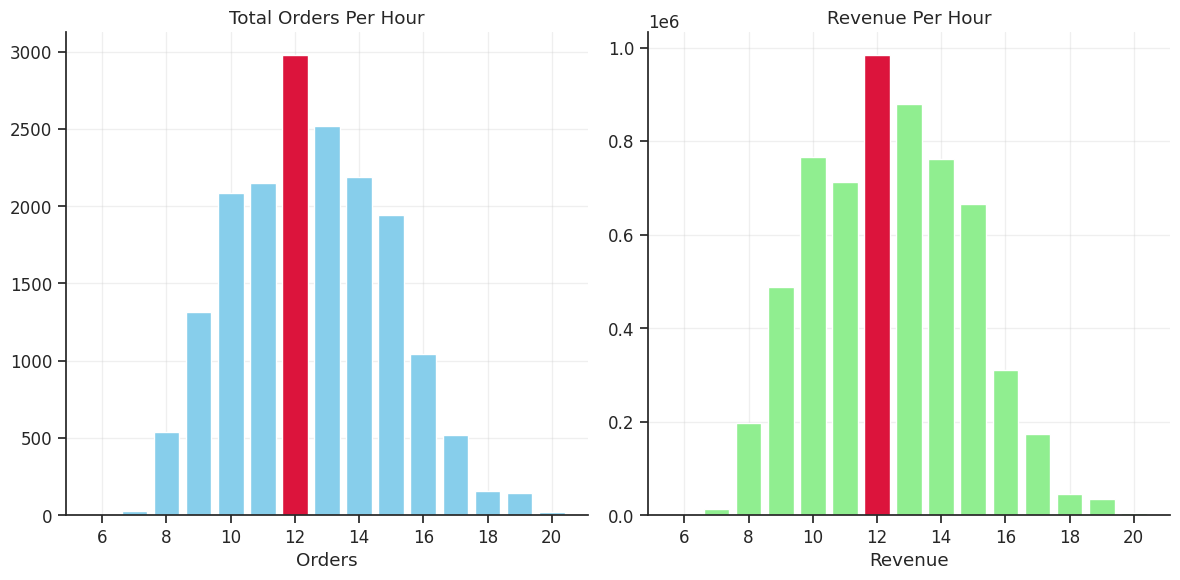

In [48]:
# 1. Sort the data for each plot
orders_sorted = hour_rush.sort_values('total_orders', ascending=True)
revenue_sorted = hour_rush.sort_values('revenue', ascending=True)

# 2. Create color lists to highlight the max and min values
orders_colors = ['crimson' if x == orders_sorted['total_orders'].max() else 'lightcoral' if x == orders_sorted['total_orders'].min() else 'skyblue' for x in orders_sorted['total_orders']]
revenue_colors = ['crimson' if x == revenue_sorted['revenue'].max() else 'lightcoral' if x == revenue_sorted['revenue'].min() else 'lightgreen' for x in revenue_sorted['revenue']]

# 3. Create the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Total Orders 
ax1.bar(orders_sorted['Hour'], orders_sorted['total_orders'], color=orders_colors)
ax1.set_title('Total Orders Per Hour')
ax1.set_xlabel('Orders')

# Plot 2: Revenue
ax2.bar(revenue_sorted['Hour'], revenue_sorted['revenue'], color=revenue_colors)
ax2.set_title('Revenue Per Hour')
ax2.set_xlabel('Revenue')

plt.tight_layout()
plt.savefig('Hour_Bar.png')
plt.show()

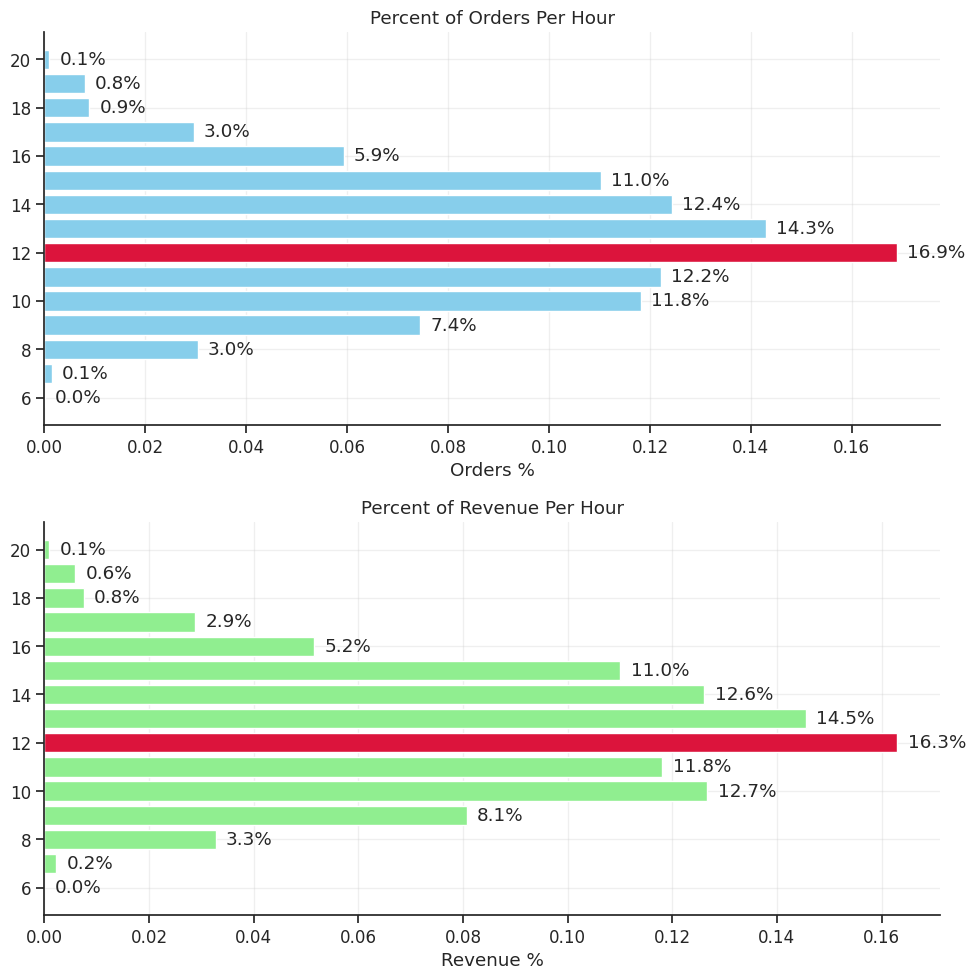

In [49]:
# 1. Sort the data for each plot
orders_sorted = hour_rush.sort_values('orders_pct', ascending=True)
revenue_sorted = hour_rush.sort_values('revenue_pct', ascending=True)

# 2. Create color lists to highlight the max and min values
orders_colors = ['crimson' if x == orders_sorted['orders_pct'].max() else 'lightcoral' if x == orders_sorted['orders_pct'].min() else 'skyblue' for x in orders_sorted['orders_pct']]
revenue_colors = ['crimson' if x == revenue_sorted['revenue_pct'].max() else 'lightcoral' if x == revenue_sorted['revenue_pct'].min() else 'lightgreen' for x in revenue_sorted['revenue_pct']]

# 3. Create the subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plot 1: Total Orders
bars1 = ax1.barh(orders_sorted['Hour'], orders_sorted['orders_pct'], color=orders_colors)
ax1.set_title('Percent of Orders Per Hour')
ax1.set_xlabel('Orders %')

# --- Add labels to the bars for Plot 1 ---
for bar in bars1:
    width = bar.get_width()
    ax1.text(width + 0.002,  # x-position
             bar.get_y() + bar.get_height() / 2,  # y-position
             f'{width:.1%}',  # The label text, formatted as a percentage
             va='center')

# Plot 2: Revenue
bars2 = ax2.barh(revenue_sorted['Hour'], revenue_sorted['revenue_pct'], color=revenue_colors)
ax2.set_title('Percent of Revenue Per Hour')
ax2.set_xlabel('Revenue %')

# --- Add labels to the bars for Plot 2 ---
for bar in bars2:
    width = bar.get_width()
    ax2.text(width + 0.002,  # x-position
             bar.get_y() + bar.get_height() / 2,  # y-position
             f'{width:.001%}',  # The label text, formatted as a percentage
             va='center')

plt.tight_layout()
plt.savefig('Hour_pct_Bar.png')
plt.show()

**12pm has the highest contribution to revenue with 16.3% and 16.9% of total orders**

**From 10am to 3pm Has the highest contribution with 78.6% of total order and 79% of revenue which indicate a high demand in mid-day**

****

In [50]:
customer_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Hour', 'Year', 'Month',
       'Day_Name', 'TotalPrice', 'year_month', 'CohortMonth', 'CohortIndex'],
      dtype='object')

## best and worst-selling products

In [51]:
products = customer_df.groupby('Description').agg(
    orders=('Quantity', 'sum'),
    sales=('TotalPrice', 'sum'),
    avg_unit_price=('UnitPrice', 'mean')  # Use 'mean' to get the average price
).reset_index().sort_values(by='sales', ascending=False)

products.head()

,Description,orders,sales,avg_unit_price
2715,REGENCY CAKESTAND 3 TIER,10035,116442.55,12.426099
3626,WHITE HANGING HEART T-LIGHT HOLDER,21921,60187.91,2.898833
2301,PARTY BUNTING,11489,53226.73,4.894598
215,ASSORTED COLOUR BIRD ORNAMENT,20351,34381.67,1.689819
1728,JUMBO BAG RED RETROSPOT,15098,30807.00,2.054418


In [52]:
orders_sorted.head()

,Hour,total_orders,revenue,orders_pct,revenue_pct
0,6,1,4.25,0.0001,0.0000
14,20,18,5473.98,0.0010,0.0009
1,7,26,14015.64,0.0015,0.0023
13,19,141,35808.94,0.0080,0.0059
12,18,157,45444.93,0.0089,0.0075


In [53]:
orders_sorted = products.sort_values('orders', ascending=False).head(20)
revenue_sorted = products.sort_values('sales', ascending=False).head(20)

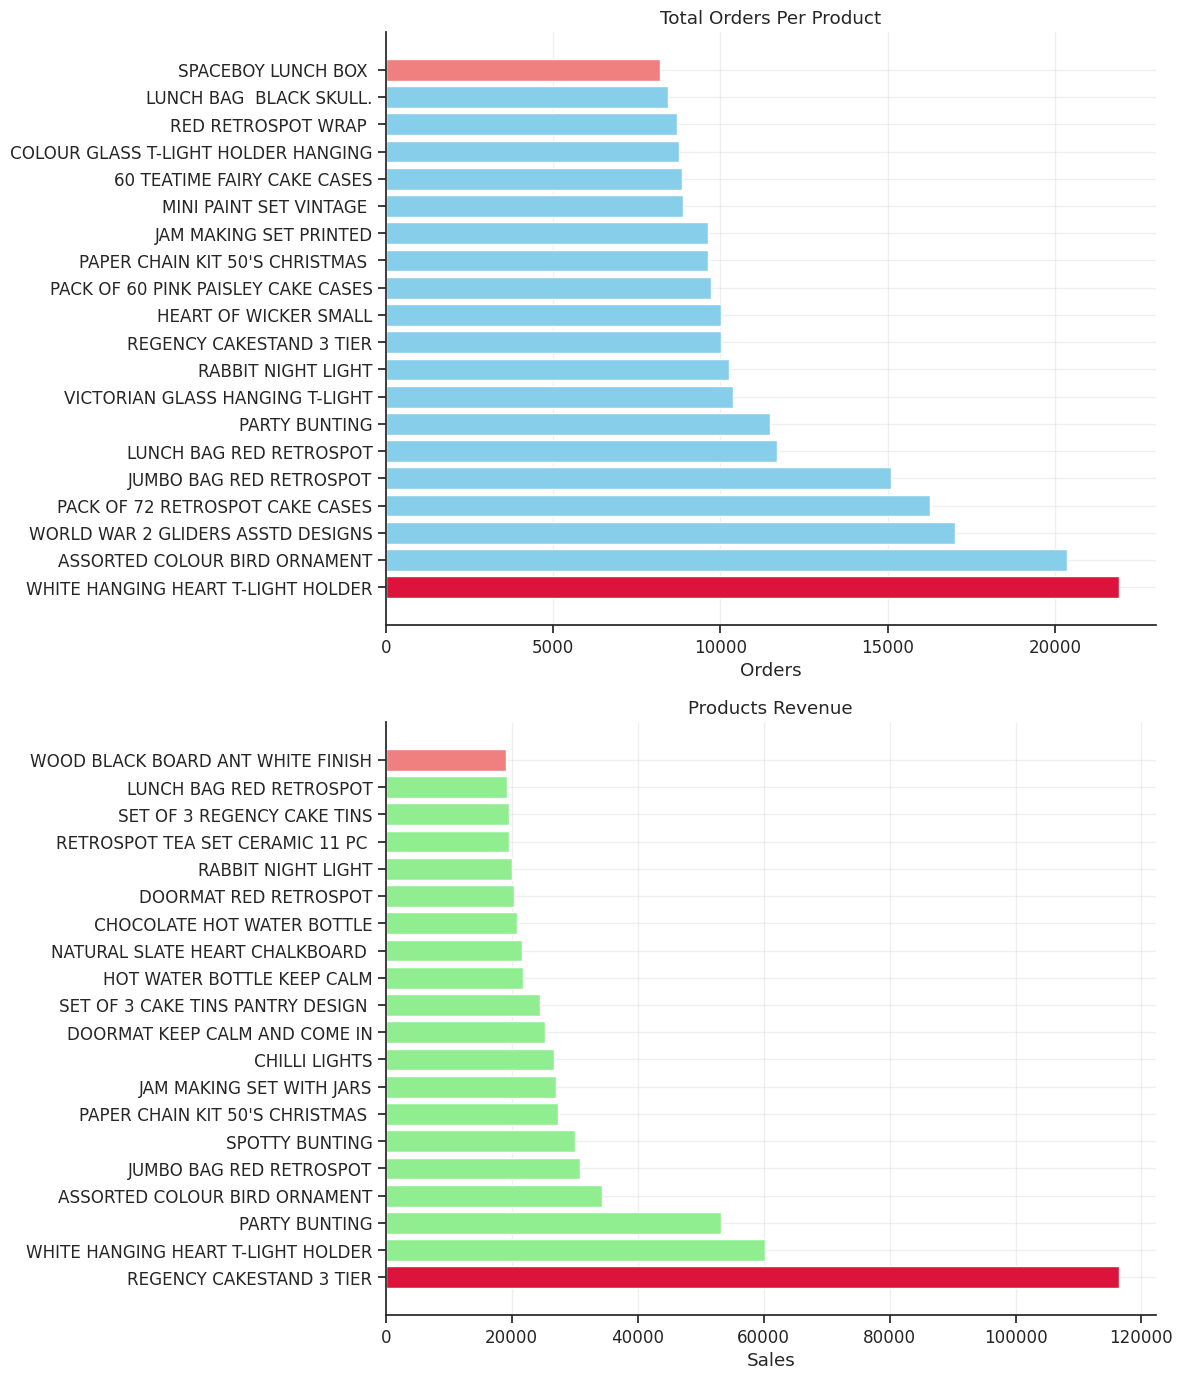

In [54]:
orders_colors = ['crimson' if x == orders_sorted['orders'].max() else 'lightcoral' if x == orders_sorted['orders'].min() else 'skyblue' for x in orders_sorted['orders']]
revenue_colors = ['crimson' if x == revenue_sorted['sales'].max() else 'lightcoral' if x == revenue_sorted['sales'].min() else 'lightgreen' for x in revenue_sorted['sales']]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 14))

# Plot 1: Total Orders 
ax1.barh(orders_sorted['Description'], orders_sorted['orders'], color=orders_colors)
ax1.set_title('Total Orders Per Product')
ax1.set_xlabel('Orders')

# Plot 2: Revenue
ax2.barh(revenue_sorted['Description'], revenue_sorted['sales'], color=revenue_colors)
ax2.set_title('Products Revenue')
ax2.set_xlabel('Sales')

plt.tight_layout()
plt.savefig('Products_Bar.png')
plt.show()

In [55]:
# mop = most_ordered_product
mop_series = orders_sorted.iloc[0]

# tsp = top_selling_product
tsp_series = revenue_sorted.iloc[0]

print(f'Most Ordered Product: {mop_series.Description}')
print(f'  Total Orders: {mop_series["orders"]}')
print(f'  Total Sales: ${mop_series["sales"]:,.2f}')
print(f'  Average Unit Price: ${mop_series["avg_unit_price"]:,.2f}')
print()
print(f'Top Selling Product: {tsp_series.Description}')
print(f'  Total Orders: {tsp_series["orders"]}')
print(f'  Total Sales: ${tsp_series["sales"]:,.2f}')
print(f'  Average Unit Price: ${tsp_series["avg_unit_price"]:,.2f}')

Most Ordered Product: WHITE HANGING HEART T-LIGHT HOLDER
  Total Orders: 21921
  Total Sales: $60,187.91
  Average Unit Price: $2.90

Top Selling Product: REGENCY CAKESTAND 3 TIER
  Total Orders: 10035
  Total Sales: $116,442.55
  Average Unit Price: $12.43


In [56]:
# lop = least_ordered_product
lop_series = orders_sorted.iloc[-1]

# lsp = lowest_selling_product
lsp_series = revenue_sorted.iloc[-1]

print(f'Least Ordered Product: {lop_series.Description}')
print(f'  Total Orders: {lop_series["orders"]}')
print(f'  Total Sales: ${lop_series["sales"]:,.2f}')
print(f'  Average Unit Price: ${lop_series["avg_unit_price"]:,.2f}')
print()
print(f'Lowest Selling Product: {lsp_series.Description}')
print(f'  Total Orders: {lsp_series["orders"]}')
print(f'  Total Sales: ${lsp_series["sales"]:,.2f}')
print(f'  Average Unit Price: ${lsp_series["avg_unit_price"]:,.2f}')

Least Ordered Product: SPACEBOY LUNCH BOX 
  Total Orders: 8212
  Total Sales: $15,274.74
  Average Unit Price: $1.94

Lowest Selling Product: WOOD BLACK BOARD ANT WHITE FINISH
  Total Orders: 2746
  Total Sales: $19,173.15
  Average Unit Price: $7.53


## products frequently bought together

In [57]:
# Remove leading/trailing whitespace from Description
customer_df['Description'] = customer_df['Description'].str.strip()

In [58]:
# Group by InvoiceNo and create a list of products for each invoice
basket = customer_df.groupby('InvoiceNo')['Description'].apply(list).reset_index()
basket

,InvoiceNo,Description
0,536365,"[WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET..."
1,536366,"[HAND WARMER UNION JACK, HAND WARMER RED POLKA..."
2,536367,"[ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHO..."
3,536368,"[JAM MAKING SET WITH JARS, RED COAT RACK PARIS..."
4,536369,[BATH BUILDING BLOCK WORD]
...,...,...
17626,581583,"[LUNCH BAG RED RETROSPOT, 6 CHOCOLATE LOVE HEA..."
17627,581584,[6 CHOCOLATE LOVE HEART T-LIGHTS]
17628,581585,"[BLACK TEA TOWEL CLASSIC DESIGN, ASSORTED BOTT..."
17629,581586,"[LARGE CAKE STAND HANGING STRAWBERY, SET OF 3..."


In [59]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# One-hot encode the data
te = TransactionEncoder()
te_ary = te.fit(basket['Description']).transform(basket['Description'])
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Find frequent itemsets using apriori
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

In [60]:
frequent_itemsets 

,support,itemsets
0,0.013102,(10 COLOUR SPACEBOY PEN)
1,0.010606,(12 MESSAGE CARDS WITH ENVELOPES)
2,0.015484,(12 PENCIL SMALL TUBE WOODLAND)
3,0.016959,(12 PENCILS SMALL TUBE RED RETROSPOT)
4,0.015824,(12 PENCILS SMALL TUBE SKULL)
...,...,...
995,0.010550,"(POPPY'S PLAYHOUSE LIVINGROOM, POPPY'S PLAYHOU..."
996,0.010266,"(REGENCY TEA PLATE GREEN, REGENCY TEA PLATE PI..."
997,0.010153,"(WOODEN STAR CHRISTMAS SCANDINAVIAN, WOODEN TR..."
998,0.012932,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY..."


In [61]:
# Generate the association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Sort the rules by confidence and lift for the best recommendations
rules = rules.sort_values(['confidence', 'lift'], ascending=[False, False])

# Display the top rules
print(rules.head())

                                           antecedents  \
950  (REGENCY TEA PLATE PINK, REGENCY TEA PLATE ROSES)   
948  (REGENCY TEA PLATE GREEN, REGENCY TEA PLATE PINK)   
956  (WOODEN HEART CHRISTMAS SCANDINAVIAN, WOODEN T...   
942  (POPPY'S PLAYHOUSE LIVINGROOM, POPPY'S PLAYHOU...   
549                           (REGENCY TEA PLATE PINK)   

                              consequents  antecedent support  \
950             (REGENCY TEA PLATE GREEN)            0.010947   
948             (REGENCY TEA PLATE ROSES)            0.011230   
956  (WOODEN STAR CHRISTMAS SCANDINAVIAN)            0.011117   
942           (POPPY'S PLAYHOUSE KITCHEN)            0.011627   
549             (REGENCY TEA PLATE GREEN)            0.012478   

     consequent support   support  confidence       lift  representativity  \
950            0.014974  0.010266    0.937824  62.631712               1.0   
948            0.018150  0.010266    0.914141  50.366335               1.0   
956            0.023935  0

In [62]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
950,"(REGENCY TEA PLATE PINK, REGENCY TEA PLATE ROSES)",(REGENCY TEA PLATE GREEN),0.010947,0.014974,0.010266,0.937824,62.631712,1.0,0.010102,15.842508,0.994925,0.655797,0.936879,0.811715
948,"(REGENCY TEA PLATE GREEN, REGENCY TEA PLATE PINK)",(REGENCY TEA PLATE ROSES),0.011230,0.018150,0.010266,0.914141,50.366335,1.0,0.010062,11.435666,0.991278,0.537092,0.912554,0.739883
956,"(WOODEN HEART CHRISTMAS SCANDINAVIAN, WOODEN T...",(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.011117,0.023935,0.010153,0.913265,38.155878,1.0,0.009886,11.253454,0.984739,0.407745,0.911138,0.668718
942,"(POPPY'S PLAYHOUSE LIVINGROOM, POPPY'S PLAYHOU...",(POPPY'S PLAYHOUSE KITCHEN),0.011627,0.019625,0.010550,0.907317,46.233836,1.0,0.010321,10.577735,0.989880,0.509589,0.905462,0.722445
549,(REGENCY TEA PLATE PINK),(REGENCY TEA PLATE GREEN),0.012478,0.014974,0.011230,0.900000,60.105682,1.0,0.011043,9.850264,0.995788,0.692308,0.898480,0.825000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,(WHITE HANGING HEART T-LIGHT HOLDER),(LUNCH BAG SPACEBOY DESIGN),0.108786,0.054903,0.010550,0.096976,1.766306,1.0,0.004577,1.046591,0.486804,0.068889,0.044517,0.144562
406,(WHITE HANGING HEART T-LIGHT HOLDER),(LUNCH BAG CARS BLUE),0.108786,0.053315,0.010436,0.095933,1.799361,1.0,0.004636,1.047140,0.498474,0.068811,0.045018,0.145839
590,(WHITE HANGING HEART T-LIGHT HOLDER),(SET/5 RED RETROSPOT LID GLASS BOWLS),0.108786,0.042992,0.010096,0.092805,2.158635,1.0,0.005419,1.054908,0.602262,0.071257,0.052050,0.163817
465,(WHITE HANGING HEART T-LIGHT HOLDER),(LUNCH BAG SUKI DESIGN),0.108786,0.049799,0.010039,0.092284,1.853135,1.0,0.004622,1.046804,0.516569,0.067583,0.044712,0.146939


****

## distribution of order values 

In [63]:
order_values = customer_df.groupby('InvoiceNo').agg(
    value=('TotalPrice','sum'),
    quantity=('Quantity','sum')
).reset_index().sort_values(by='value',ascending=False)
order_values.head()

,InvoiceNo,value,quantity
16309,578305,10462.47,2103
9114,560580,8506.31,2437
13381,571281,7975.46,1609
1917,541789,6958.14,1837
15429,576339,6878.64,2171


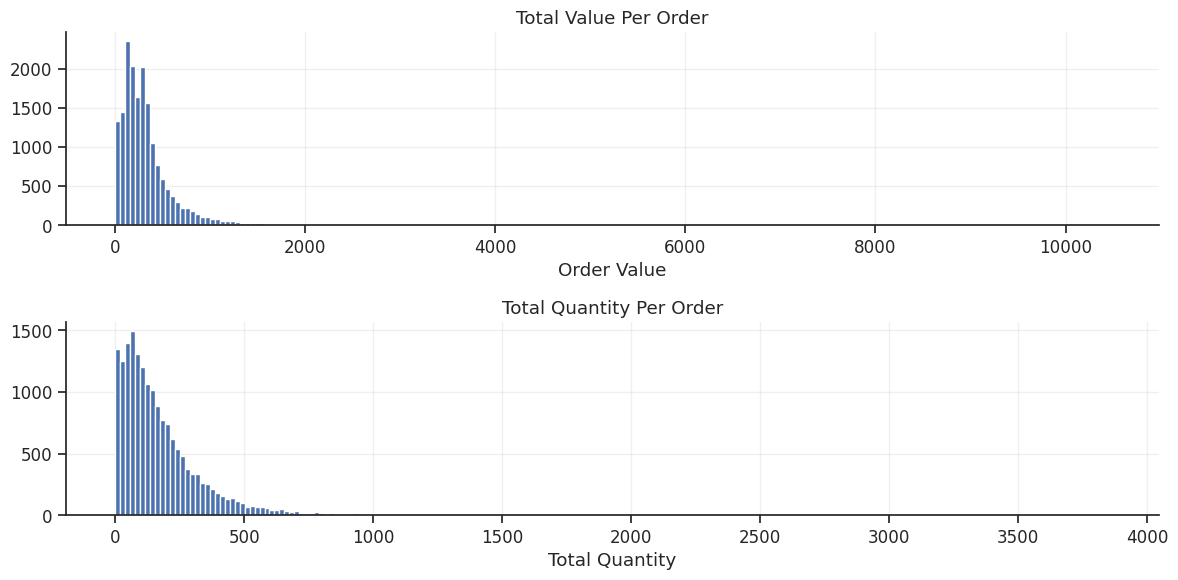

In [64]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

ax1.hist(order_values['value'],bins=200)
ax1.set_title('Total Value Per Order')
ax1.set_xlabel('Order Value')

ax2.hist(order_values['quantity'],bins=200)
ax2.set_title('Total Quantity Per Order')
ax2.set_xlabel('Total Quantity')

plt.tight_layout()
plt.savefig('quantity_order_value.png')
plt.show()

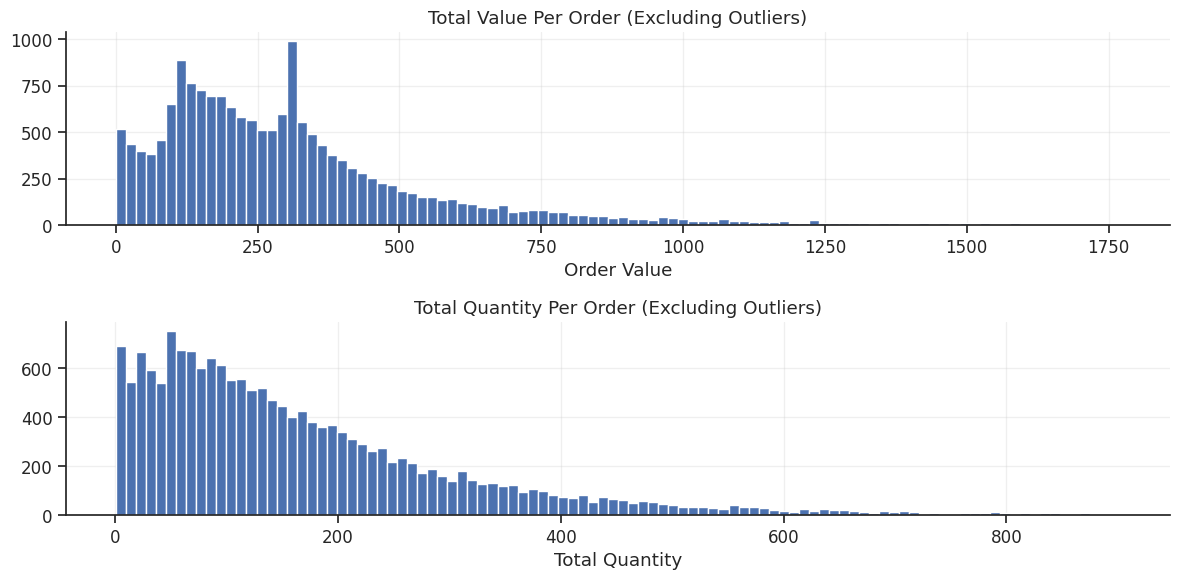

In [65]:
# --- Corrected Code ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

# Calculate the 99th percentile to identify outliers
value_cutoff = order_values['value'].quantile(0.99)
quantity_cutoff = order_values['quantity'].quantile(0.99)

# Filter the data to exclude the top 1%
filtered_values = order_values[order_values['value'] < value_cutoff]
filtered_quantity = order_values[order_values['quantity'] < quantity_cutoff]

# Plot 1: Total Value (filtered)
ax1.hist(filtered_values['value'], bins=100)
ax1.set_title('Total Value Per Order (Excluding Outliers)')
ax1.set_xlabel('Order Value')

# Plot 2: Total Quantity (filtered)
ax2.hist(filtered_quantity['quantity'], bins=100)
ax2.set_title('Total Quantity Per Order (Excluding Outliers)')
ax2.set_xlabel('Total Quantity')

plt.tight_layout()
plt.savefig('quantity_order_value_filterd.png')

plt.show()

In [66]:
(order_values[(order_values['value']< 700) & (order_values['value']>= 1)].shape[0] / order_values.shape[0])*100

90.85134138732913

In [67]:
(order_values[(order_values['quantity']< 400) & (order_values['quantity']>= 1)].shape[0] / order_values.shape[0])*100

90.85134138732913

**90% of orders quantity ranges between 1 and 400, while 90% of order value ranges from 1 to 700$**

****

# Conclusion & Strategic Recommendations

This data-driven analysis reveals a clear picture of the company's performance, customer base, and significant opportunities for growth and optimization. The key to future success lies in moving from a broad strategy to a targeted one.

**1. Dominant Market with Concentrated Value:** The business is overwhelmingly reliant on the UK market and a small group of high-value **"Champion"** customers. While this provides a stable revenue base, it also represents a risk. The immediate strategy must be to **protect and nurture this core segment** through loyalty programs and exclusive offers, while also developing targeted strategies for secondary markets like the Netherlands, which show higher revenue potential per order.

**2. Critical Customer Retention Challenge:** The analysis uncovers a pressing issue: **customer retention is declining.** While we successfully acquire new customers, we are failing to bring them back. The large segment of **"Potential Loyalists"** and the high-value **"At-Risk"** customers represent the greatest immediate opportunity. Launching win-back campaigns and post-purchase nurturing sequences is not just beneficial—it is urgent to secure long-term profitability.

**3. Clear Operational Levers to Pull:** The business is not operating at a consistent capacity throughout the week. The data provides a clear blueprint for optimization:
*   **Focus marketing efforts** (email campaigns, ad spend) during the high-activity **mid-week period (Mon-Thu)**, especially around **noon**.
*   **Align staffing and resource allocation** to this schedule to maximize efficiency and customer service during peak demand.

**4. Product and Pricing Strategy Insights:** The divergence between most-ordered and top-revenue generating products highlights a successful premium product strategy. The focus should be on **promoting high-margin items** like the "REGENCY CAKESTAND" to increase average order value, particularly among the loyal customer base.

In summary, the path forward is clear: **Shift from mass marketing to personalized customer lifecycle management.** By protecting high-value clients, re-engaging at-risk segments, and optimizing operations around clear data-driven patterns, this business can unlock significant growth and build a more resilient, loyal customer base.

****

****
# Author
## Ahmed A.Elatwy
****